In [108]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/train.csv


# Handling Missing Values of Titanic Dataset

> **To handle the missing values of numerical features we can apply**

> 1.Mean/Mode/Median Imputation

> 2.Random Sample Imputation

> 3.Capturing NAN values with new feature

> 4.End of distribution Imputation

> 5.Arbitary Imputation

> **For the categorical feature we can apply**

> 1.Frequent Category Imputation
> 
> 2.Adding variable capture NAN
> 
> 3.Capturing NAN with new Category 


In [109]:
#importing necessary libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [110]:
#load the data
train_df=pd.read_csv("../input/titanic/train.csv")

In [111]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [112]:
#missing values
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [113]:
train_df.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

> Approximately 20 percent of data in Age and 70 percent in Cabin and only .22 percent of data in Embarked are missing in train dataset .

# Numerical missing values

In [114]:
#filling the missing values with median
median=train_df['Age'].median()
train_df["Age_median"]=train_df['Age'].fillna(median)


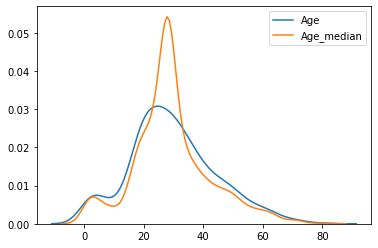

In [115]:
sns.kdeplot(train_df["Age"])
sns.kdeplot(train_df["Age_median"])

**Mean/Mode/Median Imputation**:In this the missing values of numerical features are replaced by most frequent occurance of variable that is median.

*Observation: Easy to implement but the original variance is distorted , it may impact the correlation.*

In [116]:
#filling the missing value with random sample imputation
train_df["Age_random"]=train_df["Age"]
random_sample=train_df["Age"].dropna().sample(train_df["Age"].isnull().sum())
random_sample.index=train_df[train_df["Age"].isnull()].index
train_df.loc[train_df["Age"].isnull(),"Age_random"]=random_sample


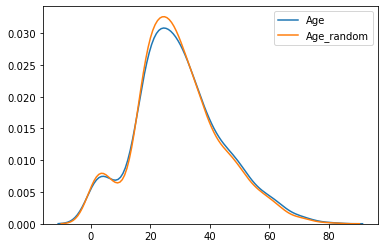

In [117]:
sns.kdeplot(train_df["Age"])
sns.kdeplot(train_df["Age_random"])

**Random Sample Distribution**:This replaces missing data with a random sample extracted from the variable.

Observation: Easy to implement and less distortion in variance

In [118]:
#capturing NAN values with new feature
train_df["Age_nan"]=np.where(train_df["Age"].isnull,1,0)

**Capturing NAN values with new feature**: This adds a new feature.

Observation: Captures the importance of the missing value. But its adds a new feature that may lead to curse of dimensionality for the large no of features.

In [119]:
#End of distribution imputer
a=train_df["Age"].mean()+3*train_df["Age"].std()
train_df["Age_end"]=train_df["Age"].fillna(a)

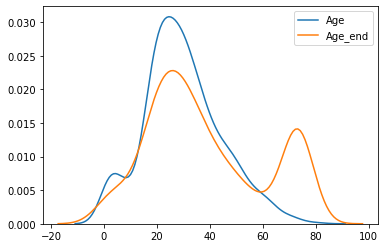

In [120]:
sns.kdeplot(train_df["Age"])
sns.kdeplot(train_df["Age_end"])

**End of distribution Imputer**: The missing values replace with the value at end of the distribution.
Observation: May impact the corelation .

In [121]:
#arbitary value imputer
train_df["Age_ninety"]=train_df["Age"].fillna(90)

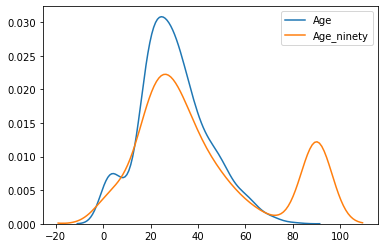

In [122]:
sns.kdeplot(train_df["Age"])
sns.kdeplot(train_df["Age_ninety"])

**Arbitary value imputer**: The missing values are replace by anu arbitary value which is not frequently present
Observation: It is difficult to choose the arbitary value and may impact the corelation.

# Categorical Missing Values

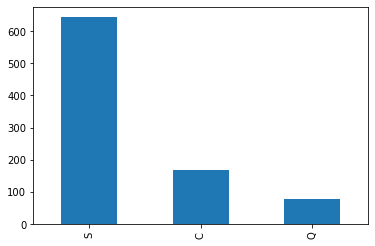

In [123]:
#Frequent Category Imputation
train_df['Embarked'].value_counts().plot.bar()

In [124]:
train_df["Embarked"].fillna(train_df['Embarked'].value_counts().index[0],inplace=True)

**Frequent Categor Imputation**: The missing values are replaced by the most frequent category.
Observation: Easy to implement but may create biased dataset because its favoring most frequent dataset. It suitable for the feature which have less no of missing values.

In [125]:
#Adding a variable capture NAN
train_df["Cabin_val"]=np.where(train_df["Cabin"].isnull(),1,0)
train_df["Cabin_cap"]=train_df["Cabin"].fillna(train_df['Cabin'].value_counts().index[0])

Adding Variable capture Nan: Replace missing value with most frequent value and adds a new feature where its helps understand the importance the missing valuee

In [126]:
#Capturing NAN value with new Category
train_df["Cabin_new"]=np.where(train_df["Cabin"].isnull,"Missing",train_df["Cabin"])

**Capturing NAN with new category**: The missing values are replaced by the new category.

In [127]:
train_df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_median,Age_random,Age_nan,Age_end,Age_ninety,Cabin_val,Cabin_cap,Cabin_new
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,22.0,1,22.00000,22.0,1,C23 C25 C27,Missing
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,38.0,1,38.00000,38.0,0,C85,Missing
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,26.0,1,26.00000,26.0,1,C23 C25 C27,Missing
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0,35.0,1,35.00000,35.0,0,C123,Missing
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0,35.0,1,35.00000,35.0,1,C23 C25 C27,Missing
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,28.0,24.0,1,73.27861,90.0,1,C23 C25 C27,Missing
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,54.0,54.0,1,54.00000,54.0,0,E46,Missing
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,2.0,2.0,1,2.00000,2.0,1,C23 C25 C27,Missing
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,27.0,27.0,1,27.00000,27.0,1,C23 C25 C27,Missing
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,14.0,14.0,1,14.00000,14.0,1,C23 C25 C27,Missing
